# APIS con credenciales

In [1]:
import requests
import pandas as pd

In [2]:

endpoint = 'https://api.nasa.gov/neo/rest/v1/neo/browse/'
payload = {'api_key': 'Oq4pEV6eVecneTxLsZjNCGmW3R87AuP05oJDR88P'}

In [3]:
r = requests.get(endpoint, params=payload)

In [4]:
r.status_code

200

In [5]:
data = r.json()

In [23]:
data

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2014402?api_key=Oq4pEV6eVecneTxLsZjNCGmW3R87AuP05oJDR88P'},
  'id': '2014402',
  'neo_reference_id': '2014402',
  'name': '14402 (1991 DB)',
  'designation': '14402',
  'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2014402',
  'absolute_magnitude_h': 18.78,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.4661814374,
    'estimated_diameter_max': 1.0424133839},
   'meters': {'estimated_diameter_min': 466.1814373895,
    'estimated_diameter_max': 1042.4133838516},
   'miles': {'estimated_diameter_min': 0.2896716259,
    'estimated_diameter_max': 0.6477254467},
   'feet': {'estimated_diameter_min': 1529.4667070451,
    'estimated_diameter_max': 3419.9915262756}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '1937-06-16',
    'close_approach_date_full': '1937-Jun-16 02:24',
    'epoch_date_close_approach': -1027028160000,
    'relative_velocity': {'kilome

In [6]:
data['near_earth_objects']

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2000433?api_key=Oq4pEV6eVecneTxLsZjNCGmW3R87AuP05oJDR88P'},
  'id': '2000433',
  'neo_reference_id': '2000433',
  'name': '433 Eros (A898 PA)',
  'name_limited': 'Eros',
  'designation': '433',
  'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433',
  'absolute_magnitude_h': 10.31,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 23.0438466577,
    'estimated_diameter_max': 51.5276075896},
   'meters': {'estimated_diameter_min': 23043.8466576534,
    'estimated_diameter_max': 51527.6075895943},
   'miles': {'estimated_diameter_min': 14.3187780415,
    'estimated_diameter_max': 32.0177610556},
   'feet': {'estimated_diameter_min': 75603.1738682955,
    'estimated_diameter_max': 169053.8360842445}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '1900-12-27',
    'close_approach_date_full': '1900-Dec-27 01:30',
    'epoch_date_close_approach': -21778794000

In [7]:
dict_datos = {}

for i in range(0, 10):
    
    try:
        r = requests.get(endpoint, params=payload, timeout=5) 

        
        if r.status_code == 200:
            json = r.json()

            data = json['near_earth_objects']
            dict_datos[i] = data

            new_link = json['links']['next']
            endpoint = new_link
    except:
        continue

In [8]:
pd.json_normalize(dict_datos[0])

,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,...,orbital_data.perihelion_distance,orbital_data.perihelion_argument,orbital_data.aphelion_distance,orbital_data.perihelion_time,orbital_data.mean_anomaly,orbital_data.mean_motion,orbital_data.equinox,orbital_data.orbit_class.orbit_class_type,orbital_data.orbit_class.orbit_class_description,orbital_data.orbit_class.orbit_class_range
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.31,False,"[{'close_approach_date': '1900-12-27', 'close_...",False,...,1.133284372081002,178.9269951795186,1.782973900121676,2459802.601698595905,110.7776526746434,.5597706088868498,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
1,2000719,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.59,False,"[{'close_approach_date': '1909-08-21', 'close_...",False,...,1.194521858788897,156.2503681890173,4.079828796226027,2459956.023234763085,10.23596428095426,.2301418330768929,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
2,2000887,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.83,False,"[{'close_approach_date': '1910-01-04', 'close_...",False,...,1.061321201278226,350.4750169387657,3.883609286075629,2460678.792844248905,188.0405622650862,.2535179888641312,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
3,2001036,2001036,1036 Ganymed (A924 UB),Ganymed,1036,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001036,9.21,False,"[{'close_approach_date': '1910-02-25', 'close_...",False,...,1.244963115585485,132.4678966480372,4.086971559151909,2460569.530751881975,231.1579652268273,.2264236763075616,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
4,2001221,2001221,1221 Amor (1932 EA1),Amor,1221,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001221,17.38,False,"[{'close_approach_date': '1900-03-08', 'close_...",False,...,1.082508630279756,26.63044254343605,2.755083241500687,2459867.321948764327,49.38482790190183,.3708180698222572,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
5,2001566,2001566,1566 Icarus (1949 MA),Icarus,1566,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001566,16.50,True,"[{'close_approach_date': '1902-06-11', 'close_...",False,...,.1866566522075338,31.44177456157897,1.969597011870541,2460008.963774233214,352.5481627358918,.8804390404064858,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...
6,2001580,2001580,1580 Betulia (1950 KA),Betulia,1580,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001580,14.69,False,"[{'close_approach_date': '1911-05-07', 'close_...",False,...,1.127290242710393,159.548559069042,3.267756371194284,2459545.513438891767,137.658301969115,.3025546548755504,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
7,2001620,2001620,1620 Geographos (1951 RA),Geographos,1620,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001620,15.32,True,"[{'close_approach_date': '1901-08-23', 'close_...",False,...,.8277062047617587,276.961189269858,1.66363949539055,2460192.265401423650,224.0534065864182,.7089213820862673,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...
8,2001627,2001627,1627 Ivar (1929 SH),Ivar,1627,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001627,12.75,False,"[{'close_approach_date': '1901-07-11', 'close_...",False,...,1.124741711376656,167.8077011003452,2.602435104414329,2460196.683424377540,283.9951363468219,.3874173564577631,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
9,2001685,2001685,1685 Toro (1948 OA),Toro,1685,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=20

In [9]:
#normalizar todos los datos
for key in dict_datos:
    normalized = pd.json_normalize(dict_datos[key])
     
    dict_datos[key] = normalized

In [11]:
list_df=list(dict_datos.values())
list_df

[         id neo_reference_id                         name  name_limited  \
 0   2000433          2000433           433 Eros (A898 PA)          Eros   
 1   2000719          2000719         719 Albert (A911 TB)        Albert   
 2   2000887          2000887         887 Alinda (A918 AA)        Alinda   
 3   2001036          2001036       1036 Ganymed (A924 UB)       Ganymed   
 4   2001221          2001221         1221 Amor (1932 EA1)          Amor   
 5   2001566          2001566        1566 Icarus (1949 MA)        Icarus   
 6   2001580          2001580       1580 Betulia (1950 KA)       Betulia   
 7   2001620          2001620    1620 Geographos (1951 RA)    Geographos   
 8   2001627          2001627          1627 Ivar (1929 SH)          Ivar   
 9   2001685          2001685          1685 Toro (1948 OA)          Toro   
 10  2001862          2001862        1862 Apollo (1932 HA)        Apollo   
 11  2001863          2001863      1863 Antinous (1948 EA)      Antinous   
 12  2001864

In [14]:
df_completo = pd.concat(list_df, axis=0).reset_index(drop=True)
df_completo

,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,...,orbital_data.perihelion_distance,orbital_data.perihelion_argument,orbital_data.aphelion_distance,orbital_data.perihelion_time,orbital_data.mean_anomaly,orbital_data.mean_motion,orbital_data.equinox,orbital_data.orbit_class.orbit_class_type,orbital_data.orbit_class.orbit_class_description,orbital_data.orbit_class.orbit_class_range
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.31,False,"[{'close_approach_date': '1900-12-27', 'close_...",False,...,1.133284372081002,178.9269951795186,1.782973900121676,2459802.601698595905,110.7776526746434,.5597706088868498,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
1,2000719,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.59,False,"[{'close_approach_date': '1909-08-21', 'close_...",False,...,1.194521858788897,156.2503681890173,4.079828796226027,2459956.023234763085,10.23596428095426,.2301418330768929,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
2,2000887,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.83,False,"[{'close_approach_date': '1910-01-04', 'close_...",False,...,1.061321201278226,350.4750169387657,3.883609286075629,2460678.792844248905,188.0405622650862,.2535179888641312,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
3,2001036,2001036,1036 Ganymed (A924 UB),Ganymed,1036,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001036,9.21,False,"[{'close_approach_date': '1910-02-25', 'close_...",False,...,1.244963115585485,132.4678966480372,4.086971559151909,2460569.530751881975,231.1579652268273,.2264236763075616,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
4,2001221,2001221,1221 Amor (1932 EA1),Amor,1221,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001221,17.38,False,"[{'close_approach_date': '1900-03-08', 'close_...",False,...,1.082508630279756,26.63044254343605,2.755083241500687,2459867.321948764327,49.38482790190183,.3708180698222572,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2017511,2017511,17511 (1992 QN),NaN,17511,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2017511,17.27,False,"[{'close_approach_date': '1900-12-11', 'close_...",False,...,.7627142133222808,202.4152325171258,1.61639180464341,2460112.186527771967,275.1544316058075,.7596759437935391,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...
196,2018106,2018106,18106 Blume (2000 NX3),Blume,18106,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2018106,17.86,False,"[{'close_approach_date': '1904-08-28', 'close_...",False,...,1.192706112239279,234.9988238634311,3.695369037452079,2460164.304777281760,317.7459035092652,.2579539937229889,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
197,2018109,2018109,18109 (2000 NG11),NaN,18109,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2018109,17.20,False,"[{'close_approach_date': '1902-10-30', 'close_...",False,...,1.189027722415369,319.2676184468084,2.572956855482577,2460293.109174843337,248.207803172704,.382052944468162,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
198,2018172,2018172,18172 (2000 QL7),NaN,18172,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2018172,15.61,False,"[{'close_approach_date': '1913-11-01', 'close_...",False,...,1.185177594694943,100.6968697255064,3.664108904327775,2460208.125216411387,305.7983633375924,.2610551723881788,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU


In [15]:
lista_de_dataframes = []

for key in dict_datos:
    lista_de_dataframes.append(dict_datos[key])

In [16]:
df_completo2 = pd.concat(lista_de_dataframes, axis=0).reset_index(drop=True)

In [17]:
df_completo2

,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,...,orbital_data.perihelion_distance,orbital_data.perihelion_argument,orbital_data.aphelion_distance,orbital_data.perihelion_time,orbital_data.mean_anomaly,orbital_data.mean_motion,orbital_data.equinox,orbital_data.orbit_class.orbit_class_type,orbital_data.orbit_class.orbit_class_description,orbital_data.orbit_class.orbit_class_range
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.31,False,"[{'close_approach_date': '1900-12-27', 'close_...",False,...,1.133284372081002,178.9269951795186,1.782973900121676,2459802.601698595905,110.7776526746434,.5597706088868498,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
1,2000719,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.59,False,"[{'close_approach_date': '1909-08-21', 'close_...",False,...,1.194521858788897,156.2503681890173,4.079828796226027,2459956.023234763085,10.23596428095426,.2301418330768929,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
2,2000887,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.83,False,"[{'close_approach_date': '1910-01-04', 'close_...",False,...,1.061321201278226,350.4750169387657,3.883609286075629,2460678.792844248905,188.0405622650862,.2535179888641312,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
3,2001036,2001036,1036 Ganymed (A924 UB),Ganymed,1036,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001036,9.21,False,"[{'close_approach_date': '1910-02-25', 'close_...",False,...,1.244963115585485,132.4678966480372,4.086971559151909,2460569.530751881975,231.1579652268273,.2264236763075616,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
4,2001221,2001221,1221 Amor (1932 EA1),Amor,1221,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001221,17.38,False,"[{'close_approach_date': '1900-03-08', 'close_...",False,...,1.082508630279756,26.63044254343605,2.755083241500687,2459867.321948764327,49.38482790190183,.3708180698222572,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2017511,2017511,17511 (1992 QN),NaN,17511,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2017511,17.27,False,"[{'close_approach_date': '1900-12-11', 'close_...",False,...,.7627142133222808,202.4152325171258,1.61639180464341,2460112.186527771967,275.1544316058075,.7596759437935391,J2000,APO,Near-Earth asteroid orbits which cross the Ear...,a (semi-major axis) > 1.0 AU; q (perihelion) <...
196,2018106,2018106,18106 Blume (2000 NX3),Blume,18106,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2018106,17.86,False,"[{'close_approach_date': '1904-08-28', 'close_...",False,...,1.192706112239279,234.9988238634311,3.695369037452079,2460164.304777281760,317.7459035092652,.2579539937229889,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
197,2018109,2018109,18109 (2000 NG11),NaN,18109,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2018109,17.20,False,"[{'close_approach_date': '1902-10-30', 'close_...",False,...,1.189027722415369,319.2676184468084,2.572956855482577,2460293.109174843337,248.207803172704,.382052944468162,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU
198,2018172,2018172,18172 (2000 QL7),NaN,18172,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2018172,15.61,False,"[{'close_approach_date': '1913-11-01', 'close_...",False,...,1.185177594694943,100.6968697255064,3.664108904327775,2460208.125216411387,305.7983633375924,.2610551723881788,J2000,AMO,Near-Earth asteroid orbits similar to that of ...,1.017 AU < q (perihelion) < 1.3 AU


# Imágenes

<img src = "Colores.png" width = 600/>

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
#0 a 255 van los números de las matrices de los colores 
img = mpimg.imread("cat.jpeg")

In [3]:
img.shape

(800, 1200, 3)

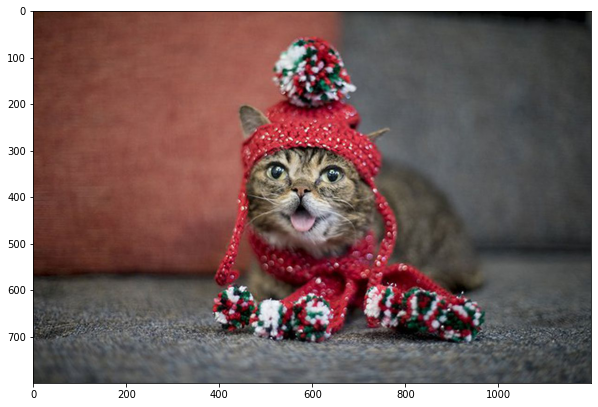

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(img)

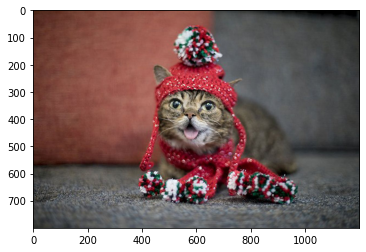

In [5]:
import numpy as np
img2 = np.zeros(img.shape,dtype = int)

img2[:,:,0]  = img[:,:,0]
img2[:,:,1]  = img[:,:,1]
img2[:,:,2]  = img[:,:,2]
plt.imshow(img2)

In [6]:
img = mpimg.imread("rubik.png")

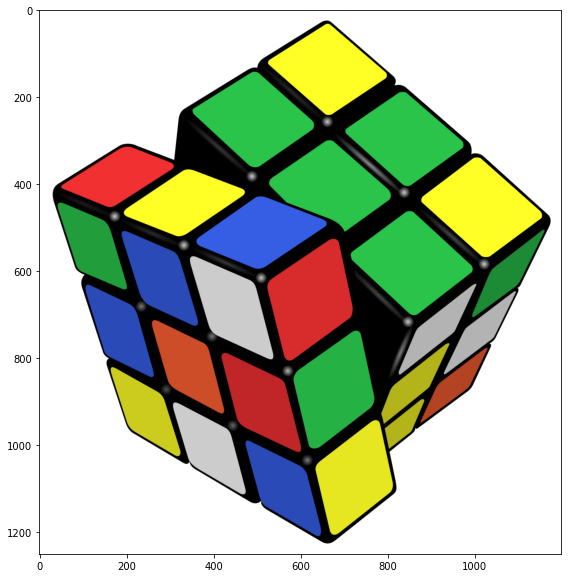

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [8]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

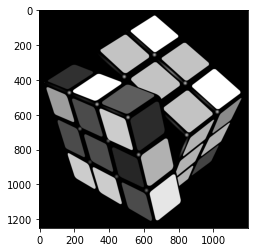

In [9]:
plt.imshow(G, cmap='gray')